In [3]:
import pandas as pd
import ISLP
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [ ]:
def simple_linear_regression(X, Y):
    """
    Perform simple linear regression to predict a quantitative response Y 
    based on a single predictor variable X.
    
    Model:
        Y ≈ β₀ + β₁X
    
    Where:
        - β₀ (beta_0): intercept term
        - β₁ (beta_1): slope term
        - Y: quantitative response variable
        - X: single predictor variable
    
    The model assumes an approximately linear relationship between X and Y.
    
    Prediction:
        ŷ = β̂₀ + β̂₁x
    
    Where β̂₀ and β̂₁ are estimates of the model coefficients obtained from 
    training data, and ŷ is the predicted value for a given x.
    
    Example:
        Regressing sales onto TV advertising:
        sales ≈ β₀ + β₁ × TV
    
    Parameters
    ----------
    X : array-like
        Predictor variable (e.g., TV advertising budget)
    Y : array-like
        Response variable (e.g., sales)
    
    Returns
    -------
    beta_0_hat : float
        Estimated intercept
    beta_1_hat : float
        Estimated slope
    """
    # Implementation here
    pass


In [ ]:
def estimate_coefficients(X, Y):
    """
    Estimate coefficients β₀ and β₁ for simple linear regression using the 
    least squares approach.
    
    Given n observation pairs:
        (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)
    
    Goal:
        Find β̂₀ and β̂₁ such that yᵢ ≈ β̂₀ + β̂₁xᵢ for i = 1, ..., n
    
    Residual:
        eᵢ = yᵢ - ŷᵢ = yᵢ - (β̂₀ + β̂₁xᵢ)
    
    Residual Sum of Squares (RSS):
        RSS = e₁² + e₂² + ... + eₙ²
            = (y₁ - β̂₀ - β̂₁x₁)² + (y₂ - β̂₀ - β̂₁x₂)² + ... + (yₙ - β̂₀ - β̂₁xₙ)²
    
    Least Squares Estimates (minimizers of RSS):
        
        β̂₁ = Σⁿᵢ₌₁(xᵢ - x̄)(yᵢ - ȳ) / Σⁿᵢ₌₁(xᵢ - x̄)²
        
        β̂₀ = ȳ - β̂₁x̄
    
    Where:
        - x̄ = (1/n)Σⁿᵢ₌₁xᵢ : sample mean of X
        - ȳ = (1/n)Σⁿᵢ₌₁yᵢ : sample mean of Y
    
    Example (Advertising data):
        With sales as response and TV as predictor:
        β̂₀ = 7.03, β̂₁ = 0.0475
        Interpretation: An additional $1,000 spent on TV advertising is 
        associated with selling approximately 47.5 additional units.
    
    Parameters
    ----------
    X : array-like, shape (n,)
        Predictor variable observations
    Y : array-like, shape (n,)
        Response variable observations
    
    Returns
    -------
    beta_0_hat : float
        Estimated intercept (minimizes RSS)
    beta_1_hat : float
        Estimated slope (minimizes RSS)
    """
    # Implementation here
    pass

In [ ]:
def assess_coefficient_accuracy(X, Y, beta_0_hat, beta_1_hat):
    """
    Assess the accuracy of coefficient estimates for simple linear regression.
    
    True Relationship (Population Regression Line):
        Y = β₀ + β₁X + ε
    
    Where:
        - β₀: intercept (expected value of Y when X = 0)
        - β₁: slope (average increase in Y per one-unit increase in X)
        - ε: error term (mean-zero, independent of X)
    
    Standard Errors:
        SE(β̂₁)² = σ² / Σⁿᵢ₌₁(xᵢ - x̄)²
        
        SE(β̂₀)² = σ²[1/n + x̄² / Σⁿᵢ₌₁(xᵢ - x̄)²]
    
    Where:
        - σ² = Var(ε): variance of error term
        - RSE = √[RSS/(n-2)]: residual standard error (estimates σ)
    
    95% Confidence Intervals:
        For β₁: [β̂₁ - 2·SE(β̂₁), β̂₁ + 2·SE(β̂₁)]
        For β₀: [β̂₀ - 2·SE(β̂₀), β̂₀ + 2·SE(β̂₀)]
    
    Hypothesis Testing:
        H₀: β₁ = 0 (no relationship between X and Y)
        Hₐ: β₁ ≠ 0 (relationship exists)
        
        t-statistic: t = (β̂₁ - 0) / SE(β̂₁)
        
        The t-statistic follows a t-distribution with (n-2) degrees of freedom.
        Small p-value (typically < 0.05 or < 0.01) → reject H₀
    
    Key Properties:
        - Unbiased: E[β̂₀] = β₀, E[β̂₁] = β₁
        - SE(β̂₁) smaller when xᵢ values are more spread out
        - Larger |t| → stronger evidence against H₀
    
    Example (Advertising data - TV vs Sales):
        β̂₀ = 7.0325, SE(β̂₀) = 0.4578, t = 15.36, p < 0.0001
        β̂₁ = 0.0475, SE(β̂₁) = 0.0027, t = 17.67, p < 0.0001
        95% CI for β₁: [0.042, 0.053]
        
        Interpretation: Each $1,000 increase in TV advertising is associated 
        with 42-53 additional unit sales (95% confidence).
    
    Parameters
    ----------
    X : array-like, shape (n,)
        Predictor variable observations
    Y : array-like, shape (n,)
        Response variable observations
    beta_0_hat : float
        Estimated intercept
    beta_1_hat : float
        Estimated slope
    
    Returns
    -------
    SE_beta_0 : float
        Standard error of intercept estimate
    SE_beta_1 : float
        Standard error of slope estimate
    t_stat_beta_0 : float
        t-statistic for intercept
    t_stat_beta_1 : float
        t-statistic for slope
    p_value_beta_0 : float
        p-value for testing H₀: β₀ = 0
    p_value_beta_1 : float
        p-value for testing H₀: β₁ = 0
    CI_beta_0 : tuple
        95% confidence interval for β₀
    CI_beta_1 : tuple
        95% confidence interval for β₁
    """
    # Implementation here
    pass

In [1]:
"""
Simple Linear Regression Implementation

This module implements simple linear regression for predicting a quantitative 
response Y based on a single predictor variable X.
"""

import numpy as np


def simple_linear_regression(X, Y):
    """
    Perform simple linear regression to model the relationship between X and Y.
    
    Simple linear regression assumes an approximately linear relationship:
        Y ≈ β₀ + β₁X
    
    Where:
        Y = quantitative response (dependent variable)
        X = single predictor variable (independent variable)
        β₀ = intercept (unknown constant)
        β₁ = slope (unknown constant)
    
    The model estimates β₀ and β₁ from training data to produce β̂₀ and β̂₁.
    
    Predictions are made using:
        ŷ = β̂₀ + β̂₁x
    
    Where:
        ŷ = predicted value of Y
        x = given value of X
        β̂₀ = estimated intercept
        β̂₁ = estimated slope
    
    Example:
        If X represents TV advertising and Y represents sales:
            sales ≈ β₀ + β₁ × TV
    
    Parameters:
    -----------
    X : array-like
        Predictor variable (independent variable)
    Y : array-like
        Response variable (dependent variable)
    
    Returns:
    --------
    dict
        Dictionary containing:
        - 'beta_0': Estimated intercept (β̂₀)
        - 'beta_1': Estimated slope (β̂₁)
        - 'predict': Function to make predictions
    """
    X = np.array(X)
    Y = np.array(Y)
    
    # Calculate means
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    # Calculate β̂₁ (slope): β̂₁ = Σ(xᵢ - x̄)(yᵢ - ȳ) / Σ(xᵢ - x̄)²
    numerator = np.sum((X - x_mean) * (Y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    beta_1 = numerator / denominator
    
    # Calculate β̂₀ (intercept): β̂₀ = ȳ - β̂₁x̄
    beta_0 = y_mean - beta_1 * x_mean
    
    def predict(x):
        """
        Make predictions using the fitted model.
        
        Uses equation: ŷ = β̂₀ + β̂₁x
        
        Parameters:
        -----------
        x : float or array-like
            Value(s) of predictor variable
        
        Returns:
        --------
        float or array
            Predicted value(s)
        """
        return beta_0 + beta_1 * np.array(x)
    
    return {
        'beta_0': beta_0,
        'beta_1': beta_1,
        'predict': predict
    }


# Example usage
if __name__ == "__main__":
    # Example: TV advertising (X) vs Sales (Y)
    TV = [230.1, 44.5, 17.2, 151.5, 180.8]
    Sales = [22.1, 10.4, 9.3, 18.5, 12.9]
    
    # Fit the model
    model = simple_linear_regression(TV, Sales)
    
    print(f"Estimated intercept (β̂₀): {model['beta_0']:.4f}")
    print(f"Estimated slope (β̂₁): {model['beta_1']:.4f}")
    print(f"\nModel equation: sales ≈ {model['beta_0']:.4f} + {model['beta_1']:.4f} × TV")
    
    # Make predictions
    new_tv_budget = 200
    predicted_sales = model['predict'](new_tv_budget)
    print(f"\nPredicted sales for TV budget ${new_tv_budget}k: {predicted_sales:.2f}")

Estimated intercept (β̂₀): 8.1791
Estimated slope (β̂₁): 0.0518

Model equation: sales ≈ 8.1791 + 0.0518 × TV

Predicted sales for TV budget $200k: 18.53


SIMPLE LINEAR REGRESSION - LEAST SQUARES ESTIMATION

Dataset: n = 20 observations
Predictor (X): TV advertising budget
Response (Y): Sales

COEFFICIENT ESTIMATION
------------------------------------------------------------
Sample mean of X (x̄): 119.3100
Sample mean of Y (ȳ): 13.4950

Estimated intercept (β̂₀): 6.8502
Estimated slope (β̂₁): 0.0557

Model equation: sales ≈ 6.8502 + 0.0557 × TV


RESIDUAL ANALYSIS
------------------------------------------------------------
Residual Sum of Squares (RSS): 143.2087
Mean squared error: 7.1604

First 5 residuals (eᵢ = yᵢ - ŷᵢ):
  e_1 = 2.4347
  e_2 = 1.0714
  e_3 = 1.4918
  e_4 = 3.2122
  e_5 = -4.0196


INTERPRETATION
------------------------------------------------------------
An additional $1,000 spent on TV advertising is associated with
selling approximately 0.06 additional units.


PREDICTIONS
------------------------------------------------------------
TV Budget ($k)       Predicted Sales     
----------------------------------------

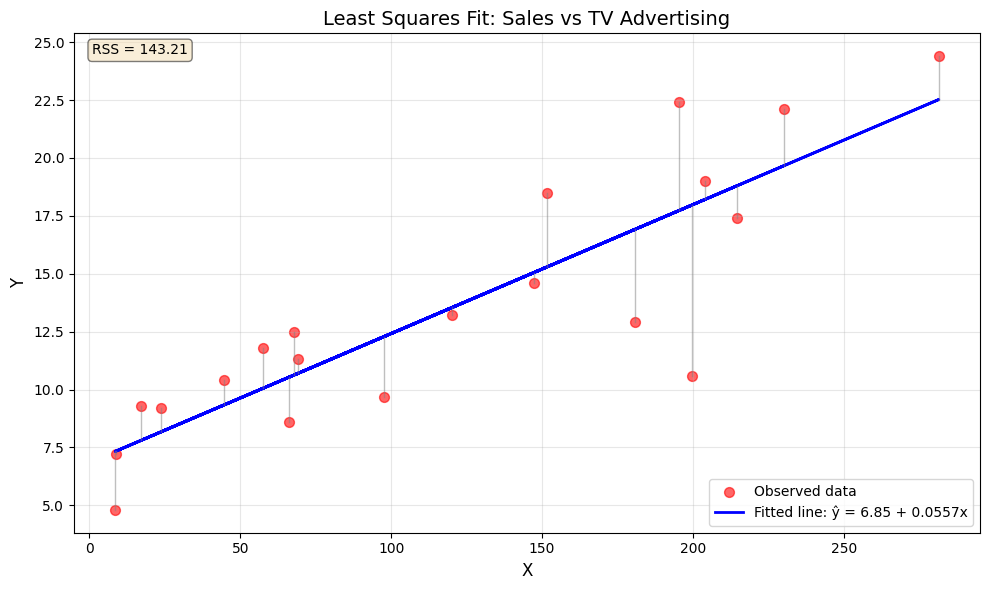

In [2]:
"""
Simple Linear Regression Implementation

This module implements simple linear regression for predicting a quantitative 
response Y based on a single predictor variable X, including coefficient 
estimation using the least squares criterion.
"""

import numpy as np
import matplotlib.pyplot as plt


def estimate_coefficients_least_squares(X, Y):
    """
    Estimate coefficients β̂₀ and β̂₁ using the least squares approach.
    
    THEORY:
    -------
    Given n observation pairs: (x₁, y₁), (x₂, y₂), ..., (xₙ, yₙ)
    
    Goal: Find β̂₀ and β̂₁ such that yᵢ ≈ β̂₀ + β̂₁xᵢ for i = 1, ..., n
    
    RESIDUALS:
    ----------
    For each observation i:
        ŷᵢ = β̂₀ + β̂₁xᵢ         (prediction)
        eᵢ = yᵢ - ŷᵢ            (residual)
    
    The residual is the difference between observed and predicted response.
    
    RESIDUAL SUM OF SQUARES (RSS):
    -------------------------------
        RSS = e₁² + e₂² + ... + eₙ²
        
    Or equivalently:
        RSS = (y₁ - β̂₀ - β̂₁x₁)² + (y₂ - β̂₀ - β̂₁x₂)² + ... + (yₙ - β̂₀ - β̂₁xₙ)²
    
    LEAST SQUARES CRITERION:
    ------------------------
    Choose β̂₀ and β̂₁ to minimize RSS.
    
    COEFFICIENT FORMULAS:
    ---------------------
    Using calculus, the minimizers are:
    
        β̂₁ = Σᵢ(xᵢ - x̄)(yᵢ - ȳ) / Σᵢ(xᵢ - x̄)²
        
        β̂₀ = ȳ - β̂₁x̄
    
    Where:
        x̄ = (1/n)Σᵢxᵢ  (sample mean of X)
        ȳ = (1/n)Σᵢyᵢ  (sample mean of Y)
    
    Parameters:
    -----------
    X : array-like
        Predictor variable values (x₁, x₂, ..., xₙ)
    Y : array-like
        Response variable values (y₁, y₂, ..., yₙ)
    
    Returns:
    --------
    dict
        Dictionary containing:
        - 'beta_0': Estimated intercept (β̂₀)
        - 'beta_1': Estimated slope (β̂₁)
        - 'x_mean': Sample mean of X (x̄)
        - 'y_mean': Sample mean of Y (ȳ)
        - 'rss': Residual sum of squares
        - 'residuals': Array of residuals (eᵢ)
    """
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    
    # Calculate sample means: x̄ and ȳ
    x_mean = np.mean(X)  # x̄ = (1/n)Σᵢxᵢ
    y_mean = np.mean(Y)  # ȳ = (1/n)Σᵢyᵢ
    
    # Calculate β̂₁ (slope): Σᵢ(xᵢ - x̄)(yᵢ - ȳ) / Σᵢ(xᵢ - x̄)²
    numerator = np.sum((X - x_mean) * (Y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    beta_1 = numerator / denominator
    
    # Calculate β̂₀ (intercept): ȳ - β̂₁x̄
    beta_0 = y_mean - beta_1 * x_mean
    
    # Calculate predictions: ŷᵢ = β̂₀ + β̂₁xᵢ
    y_pred = beta_0 + beta_1 * X
    
    # Calculate residuals: eᵢ = yᵢ - ŷᵢ
    residuals = Y - y_pred
    
    # Calculate RSS: Σᵢeᵢ²
    rss = np.sum(residuals ** 2)
    
    return {
        'beta_0': beta_0,
        'beta_1': beta_1,
        'x_mean': x_mean,
        'y_mean': y_mean,
        'rss': rss,
        'residuals': residuals,
        'n': n
    }


def calculate_rss(X, Y, beta_0, beta_1):
    """
    Calculate Residual Sum of Squares for given coefficients.
    
    RSS = Σᵢ(yᵢ - β̂₀ - β̂₁xᵢ)²
    
    Parameters:
    -----------
    X : array-like
        Predictor variable values
    Y : array-like
        Response variable values
    beta_0 : float
        Intercept coefficient
    beta_1 : float
        Slope coefficient
    
    Returns:
    --------
    float
        Residual sum of squares
    """
    X = np.array(X)
    Y = np.array(Y)
    
    # Calculate predictions
    y_pred = beta_0 + beta_1 * X
    
    # Calculate residuals
    residuals = Y - y_pred
    
    # Calculate RSS
    rss = np.sum(residuals ** 2)
    
    return rss


def plot_regression_fit(X, Y, results, title="Least Squares Regression Fit"):
    """
    Visualize the regression fit with residuals.
    
    Shows:
    - Data points
    - Fitted regression line
    - Residuals as grey line segments
    
    Parameters:
    -----------
    X : array-like
        Predictor variable values
    Y : array-like
        Response variable values
    results : dict
        Results from estimate_coefficients_least_squares()
    title : str
        Plot title
    """
    X = np.array(X)
    Y = np.array(Y)
    
    beta_0 = results['beta_0']
    beta_1 = results['beta_1']
    
    # Create predictions for line
    y_pred = beta_0 + beta_1 * X
    
    # Create plot
    plt.figure(figsize=(10, 6))
    
    # Plot data points
    plt.scatter(X, Y, color='red', s=50, alpha=0.6, label='Observed data')
    
    # Plot regression line
    plt.plot(X, y_pred, color='blue', linewidth=2, label=f'Fitted line: ŷ = {beta_0:.2f} + {beta_1:.4f}x')
    
    # Plot residuals as grey segments
    for i in range(len(X)):
        plt.plot([X[i], X[i]], [Y[i], y_pred[i]], color='grey', linewidth=1, alpha=0.5)
    
    plt.xlabel('X', fontsize=12)
    plt.ylabel('Y', fontsize=12)
    plt.title(title, fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add RSS info
    plt.text(0.02, 0.98, f'RSS = {results["rss"]:.2f}', 
             transform=plt.gca().transAxes, 
             verticalalignment='top',
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    plt.tight_layout()
    return plt


def simple_linear_regression(X, Y):
    """
    Convenience wrapper that performs coefficient estimation and returns prediction function.
    
    Parameters:
    -----------
    X : array-like
        Predictor variable
    Y : array-like
        Response variable
    
    Returns:
    --------
    dict
        Dictionary with coefficients and predict function
    """
    results = estimate_coefficients_least_squares(X, Y)
    
    def predict(x):
        """Predict using: ŷ = β̂₀ + β̂₁x"""
        return results['beta_0'] + results['beta_1'] * np.array(x)
    
    return {
        'beta_0': results['beta_0'],
        'beta_1': results['beta_1'],
        'rss': results['rss'],
        'predict': predict
    }


# Example usage
if __name__ == "__main__":
    print("="*60)
    print("SIMPLE LINEAR REGRESSION - LEAST SQUARES ESTIMATION")
    print("="*60)
    
    # Example: TV advertising (X) vs Sales (Y)
    # Simulating n observations
    TV = np.array([230.1, 44.5, 17.2, 151.5, 180.8, 8.7, 57.5, 120.2, 8.6, 199.8,
                   66.1, 214.7, 23.8, 97.5, 204.1, 195.4, 67.8, 281.4, 69.2, 147.3])
    Sales = np.array([22.1, 10.4, 9.3, 18.5, 12.9, 7.2, 11.8, 13.2, 4.8, 10.6,
                      8.6, 17.4, 9.2, 9.7, 19.0, 22.4, 12.5, 24.4, 11.3, 14.6])
    
    n = len(TV)
    print(f"\nDataset: n = {n} observations")
    print(f"Predictor (X): TV advertising budget")
    print(f"Response (Y): Sales\n")
    
    # Estimate coefficients using least squares
    print("COEFFICIENT ESTIMATION")
    print("-" * 60)
    results = estimate_coefficients_least_squares(TV, Sales)
    
    print(f"Sample mean of X (x̄): {results['x_mean']:.4f}")
    print(f"Sample mean of Y (ȳ): {results['y_mean']:.4f}")
    print(f"\nEstimated intercept (β̂₀): {results['beta_0']:.4f}")
    print(f"Estimated slope (β̂₁): {results['beta_1']:.4f}")
    print(f"\nModel equation: sales ≈ {results['beta_0']:.4f} + {results['beta_1']:.4f} × TV")
    
    # RSS and residuals
    print(f"\n\nRESIDUAL ANALYSIS")
    print("-" * 60)
    print(f"Residual Sum of Squares (RSS): {results['rss']:.4f}")
    print(f"Mean squared error: {results['rss']/n:.4f}")
    print(f"\nFirst 5 residuals (eᵢ = yᵢ - ŷᵢ):")
    for i in range(min(5, n)):
        print(f"  e_{i+1} = {results['residuals'][i]:.4f}")
    
    # Interpretation
    print(f"\n\nINTERPRETATION")
    print("-" * 60)
    print(f"An additional $1,000 spent on TV advertising is associated with")
    print(f"selling approximately {results['beta_1']*1:.2f} additional units.")
    
    # Make predictions
    print(f"\n\nPREDICTIONS")
    print("-" * 60)
    model = simple_linear_regression(TV, Sales)
    test_budgets = [50, 100, 150, 200, 250]
    print(f"{'TV Budget ($k)':<20} {'Predicted Sales':<20}")
    print("-" * 40)
    for budget in test_budgets:
        pred = model['predict'](budget)
        print(f"{budget:<20} {pred:.2f}")
    
    # Verify RSS calculation
    print(f"\n\nVERIFICATION")
    print("-" * 60)
    rss_manual = calculate_rss(TV, Sales, results['beta_0'], results['beta_1'])
    print(f"RSS from coefficient estimation: {results['rss']:.4f}")
    print(f"RSS from manual calculation: {rss_manual:.4f}")
    print(f"Match: {np.isclose(results['rss'], rss_manual)}")
    
    # Create visualization
    print(f"\n\nGenerating plot...")
    plot = plot_regression_fit(TV, Sales, results, 
                               title="Least Squares Fit: Sales vs TV Advertising")
    # plot.savefig('/home/claude/regression_fit.png', dpi=300, bbox_inches='tight')
    print("Plot saved as 'regression_fit.png'")
    
    print("\n" + "="*60)
    print("Analysis complete!")
    print("="*60)

ASSESSING ACCURACY OF COEFFICIENT ESTIMATES

1. COEFFICIENT ACCURACY ASSESSMENT
--------------------------------------------------------------------------------

LINEAR REGRESSION: Sales ~ TV

Coefficient     Estimate        Std. Error      t-statistic     p-value        
--------------------------------------------------------------------------------
Intercept       7.3456          0.3967          18.52           < 0.0001       
TV              0.0467          0.0023          20.01           < 0.0001       

--------------------------------------------------------------------------------
Residual standard error: 2.9136 on 198 degrees of freedom

95% Confidence Intervals:
  Intercept: [6.5633, 8.1279]
  TV:        [0.0421, 0.0513]

Hypothesis Tests (α = 0.05):
  H₀: β₀ = 0  →  REJECT
  H₀: β₁ = 0  →  REJECT



INTERPRETATION:
--------------------------------------------------------------------------------
An increase of $1,000 in TV advertising budget is associated with
an increase in 

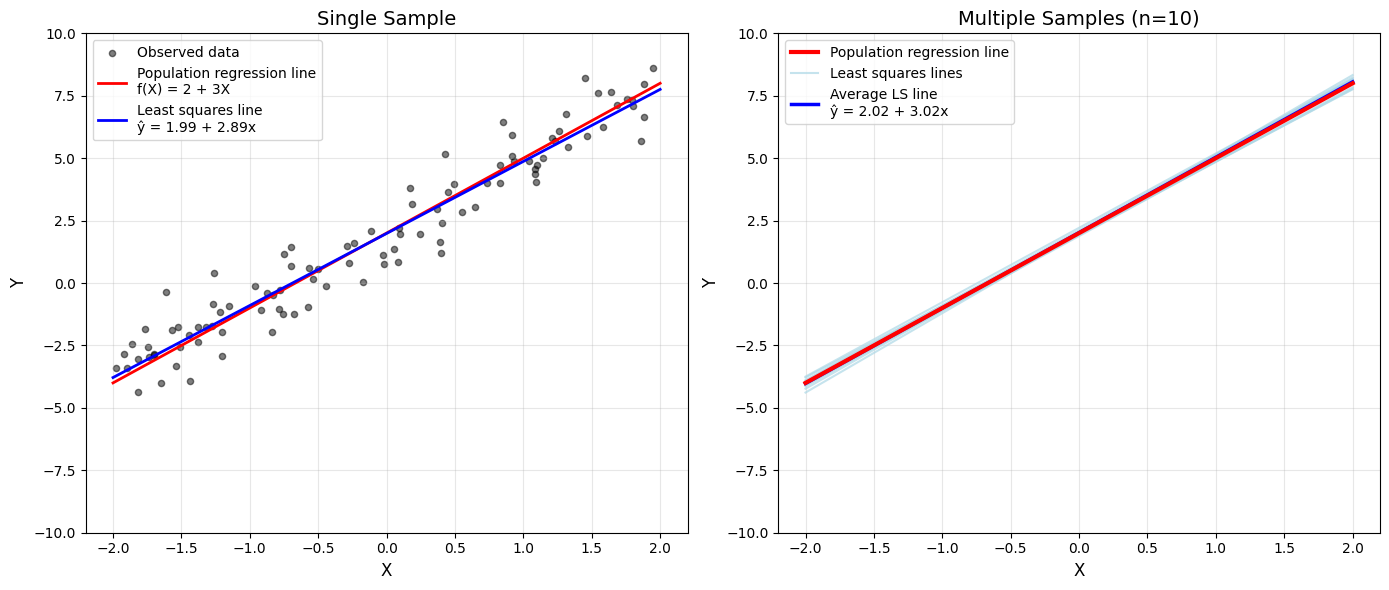

In [5]:
"""
Assessing the Accuracy of Coefficient Estimates in Linear Regression

This module implements methods for assessing the accuracy of coefficient 
estimates including standard errors, confidence intervals, and hypothesis testing.
"""

import numpy as np
from scipy import stats
import matplotlib.pyplot as plt


def assess_coefficient_accuracy(X, Y, confidence_level=0.95):
    """
    Assess the accuracy of coefficient estimates in simple linear regression.
    
    THEORETICAL FRAMEWORK:
    ----------------------
    True relationship:
        Y = β₀ + β₁X + ε                                    (3.5)
    
    Where:
        β₀ = intercept (expected value of Y when X = 0)
        β₁ = slope (average increase in Y per one-unit increase in X)
        ε = error term (catch-all for model misspecification, other variables,
                        measurement error)
    
    Assumptions:
        - Error term ε is independent of X
        - Errors have common variance σ²
        - Errors are uncorrelated
    
    POPULATION REGRESSION LINE:
    ---------------------------
    The model (3.5) defines the population regression line:
        f(X) = β₀ + β₁X
    
    This is the best linear approximation to the true relationship between X and Y.
    The population regression line is unknown in practice.
    
    LEAST SQUARES LINE:
    -------------------
    The least squares coefficient estimates β̂₀ and β̂₁ characterize the 
    least squares line:
        ŷ = β̂₀ + β̂₁x                                      (3.2)
    
    The least squares line can always be computed from observed data.
    
    BIAS AND UNBIASEDNESS:
    ----------------------
    The least squares estimates β̂₀ and β̂₁ are UNBIASED estimators:
        - On any particular dataset, estimates may over- or under-estimate true values
        - On average over many datasets, estimates equal the true parameters
        - E[β̂₀] = β₀  and  E[β̂₁] = β₁
    
    STANDARD ERRORS:
    ----------------
    Standard error measures the average amount an estimate differs from the 
    true parameter value.
    
    For the population mean:
        Var(μ̂) = SE(μ̂)² = σ²/n                           (3.7)
    
    For regression coefficients:
        SE(β̂₀)² = σ² [1/n + x̄²/Σᵢ(xᵢ - x̄)²]            (3.8)
        
        SE(β̂₁)² = σ²/Σᵢ(xᵢ - x̄)²                         (3.8)
    
    Where:
        σ² = Var(ε) (variance of errors)
        
    Properties:
        - SE(β̂₁) is smaller when xᵢ are more spread out
        - SE(β̂₀) equals SE(μ̂) when x̄ = 0
    
    RESIDUAL STANDARD ERROR (RSE):
    ------------------------------
    Since σ² is unknown, estimate it from the data:
        RSE = √[RSS/(n - 2)]
    
    CONFIDENCE INTERVALS:
    ---------------------
    95% confidence interval: range that contains true parameter with 95% probability
    
    For β₁:
        β̂₁ ± 2·SE(β̂₁)                                     (3.9)
        [β̂₁ - 2·SE(β̂₁), β̂₁ + 2·SE(β̂₁)]                 (3.10)
    
    For β₀:
        β̂₀ ± 2·SE(β̂₀)                                     (3.11)
    
    More precisely, use the 97.5% quantile of t-distribution with n-2 degrees
    of freedom instead of 2.
    
    HYPOTHESIS TESTING:
    -------------------
    Null hypothesis:
        H₀: There is no relationship between X and Y      (3.12)
        H₀: β₁ = 0
    
    Alternative hypothesis:
        Hₐ: There is some relationship between X and Y    (3.13)
        Hₐ: β₁ ≠ 0
    
    t-statistic:
        t = (β̂₁ - 0)/SE(β̂₁)                               (3.14)
    
    Measures number of standard deviations β̂₁ is away from 0.
    
    Under H₀, t follows t-distribution with n-2 degrees of freedom.
    
    p-value:
        Probability of observing |t| or larger if β₁ = 0
        Small p-value → reject H₀ → relationship exists
        Typical cutoffs: 0.05 (5%) or 0.01 (1%)
    
    Parameters:
    -----------
    X : array-like
        Predictor variable
    Y : array-like
        Response variable
    confidence_level : float, default=0.95
        Confidence level for intervals (e.g., 0.95 for 95%)
    
    Returns:
    --------
    dict
        Comprehensive results including:
        - Coefficient estimates and standard errors
        - Confidence intervals
        - t-statistics and p-values
        - Hypothesis test results
    """
    X = np.array(X)
    Y = np.array(Y)
    n = len(X)
    
    # Calculate means
    x_mean = np.mean(X)
    y_mean = np.mean(Y)
    
    # Calculate coefficient estimates β̂₁ and β̂₀
    numerator = np.sum((X - x_mean) * (Y - y_mean))
    denominator = np.sum((X - x_mean) ** 2)
    beta_1_hat = numerator / denominator
    beta_0_hat = y_mean - beta_1_hat * x_mean
    
    # Calculate predictions and residuals
    y_pred = beta_0_hat + beta_1_hat * X
    residuals = Y - y_pred
    
    # Calculate RSS (Residual Sum of Squares)
    RSS = np.sum(residuals ** 2)
    
    # Calculate RSE (Residual Standard Error): √[RSS/(n-2)]
    RSE = np.sqrt(RSS / (n - 2))
    
    # Estimate σ² using RSE
    sigma_squared = RSE ** 2
    
    # Calculate SE(β̂₁): σ²/Σᵢ(xᵢ - x̄)²
    SE_beta_1_squared = sigma_squared / denominator
    SE_beta_1 = np.sqrt(SE_beta_1_squared)
    
    # Calculate SE(β̂₀): σ²[1/n + x̄²/Σᵢ(xᵢ - x̄)²]
    SE_beta_0_squared = sigma_squared * (1/n + (x_mean**2) / denominator)
    SE_beta_0 = np.sqrt(SE_beta_0_squared)
    
    # Calculate t-statistics: t = (β̂ - 0)/SE(β̂)
    t_stat_beta_0 = beta_0_hat / SE_beta_0
    t_stat_beta_1 = beta_1_hat / SE_beta_1
    
    # Calculate p-values (two-tailed test)
    # Using t-distribution with n-2 degrees of freedom
    df = n - 2
    p_value_beta_0 = 2 * (1 - stats.t.cdf(np.abs(t_stat_beta_0), df))
    p_value_beta_1 = 2 * (1 - stats.t.cdf(np.abs(t_stat_beta_1), df))
    
    # Calculate confidence intervals
    # Get critical value from t-distribution (more precise than using 2)
    alpha = 1 - confidence_level
    t_critical = stats.t.ppf(1 - alpha/2, df)
    
    # Confidence interval for β₁: β̂₁ ± t_critical·SE(β̂₁)
    ci_beta_1_lower = beta_1_hat - t_critical * SE_beta_1
    ci_beta_1_upper = beta_1_hat + t_critical * SE_beta_1
    
    # Confidence interval for β₀: β̂₀ ± t_critical·SE(β̂₀)
    ci_beta_0_lower = beta_0_hat - t_critical * SE_beta_0
    ci_beta_0_upper = beta_0_hat + t_critical * SE_beta_0
    
    # Hypothesis test decision (typical α = 0.05)
    alpha_test = 0.05
    reject_H0_beta_0 = p_value_beta_0 < alpha_test
    reject_H0_beta_1 = p_value_beta_1 < alpha_test
    
    return {
        # Coefficient estimates
        'beta_0_hat': beta_0_hat,
        'beta_1_hat': beta_1_hat,
        
        # Standard errors
        'SE_beta_0': SE_beta_0,
        'SE_beta_1': SE_beta_1,
        'RSE': RSE,
        'sigma_squared': sigma_squared,
        
        # t-statistics
        't_stat_beta_0': t_stat_beta_0,
        't_stat_beta_1': t_stat_beta_1,
        
        # p-values
        'p_value_beta_0': p_value_beta_0,
        'p_value_beta_1': p_value_beta_1,
        
        # Confidence intervals
        'ci_beta_0': (ci_beta_0_lower, ci_beta_0_upper),
        'ci_beta_1': (ci_beta_1_lower, ci_beta_1_upper),
        'confidence_level': confidence_level,
        't_critical': t_critical,
        
        # Hypothesis tests
        'reject_H0_beta_0': reject_H0_beta_0,
        'reject_H0_beta_1': reject_H0_beta_1,
        'alpha': alpha_test,
        
        # Additional info
        'n': n,
        'df': df,
        'RSS': RSS,
        'residuals': residuals
    }


def simulate_population_vs_sample(n_datasets=10, n_obs=100, true_beta_0=2, true_beta_1=3, 
                                   sigma=1, seed=42):
    """
    Simulate the difference between population regression line and least squares lines.
    
    Demonstrates:
        - Population regression line (true relationship): Y = β₀ + β₁X + ε
        - Multiple least squares lines from different samples
        - Unbiasedness: average of least squares lines ≈ population line
    
    Parameters:
    -----------
    n_datasets : int
        Number of different datasets to generate
    n_obs : int
        Number of observations per dataset
    true_beta_0 : float
        True intercept (β₀)
    true_beta_1 : float
        True slope (β₁)
    sigma : float
        Standard deviation of error term ε
    seed : int
        Random seed for reproducibility
    
    Returns:
    --------
    dict
        Simulation results including estimates from each dataset
    """
    np.random.seed(seed)
    
    # Storage for estimates
    beta_0_estimates = []
    beta_1_estimates = []
    
    # Generate multiple datasets
    for _ in range(n_datasets):
        # Generate X values
        X = np.random.uniform(-2, 2, n_obs)
        
        # Generate errors ε ~ N(0, σ²)
        epsilon = np.random.normal(0, sigma, n_obs)
        
        # Generate Y from true model: Y = β₀ + β₁X + ε
        Y = true_beta_0 + true_beta_1 * X + epsilon
        
        # Estimate coefficients using least squares
        x_mean = np.mean(X)
        y_mean = np.mean(Y)
        
        beta_1_hat = np.sum((X - x_mean) * (Y - y_mean)) / np.sum((X - x_mean) ** 2)
        beta_0_hat = y_mean - beta_1_hat * x_mean
        
        beta_0_estimates.append(beta_0_hat)
        beta_1_estimates.append(beta_1_hat)
    
    # Calculate average estimates
    avg_beta_0 = np.mean(beta_0_estimates)
    avg_beta_1 = np.mean(beta_1_estimates)
    
    return {
        'beta_0_estimates': beta_0_estimates,
        'beta_1_estimates': beta_1_estimates,
        'avg_beta_0': avg_beta_0,
        'avg_beta_1': avg_beta_1,
        'true_beta_0': true_beta_0,
        'true_beta_1': true_beta_1,
        'bias_beta_0': avg_beta_0 - true_beta_0,
        'bias_beta_1': avg_beta_1 - true_beta_1
    }


def plot_population_vs_sample(sim_results, n_obs=100):
    """
    Visualize population regression line vs. least squares lines.
    
    Recreates Figure 3.3 from the text.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    # Generate sample data for visualization
    np.random.seed(42)
    X_sample = np.random.uniform(-2, 2, n_obs)
    epsilon = np.random.normal(0, 1, n_obs)
    Y_sample = sim_results['true_beta_0'] + sim_results['true_beta_1'] * X_sample + epsilon
    
    # Calculate least squares line for this sample
    x_mean = np.mean(X_sample)
    y_mean = np.mean(Y_sample)
    beta_1_hat = np.sum((X_sample - x_mean) * (Y_sample - y_mean)) / np.sum((X_sample - x_mean) ** 2)
    beta_0_hat = y_mean - beta_1_hat * x_mean
    
    # Left panel: Single sample
    X_plot = np.linspace(-2, 2, 100)
    Y_true = sim_results['true_beta_0'] + sim_results['true_beta_1'] * X_plot
    Y_fitted = beta_0_hat + beta_1_hat * X_plot
    
    ax1.scatter(X_sample, Y_sample, color='black', s=20, alpha=0.5, label='Observed data')
    ax1.plot(X_plot, Y_true, 'r-', linewidth=2, label=f'Population regression line\nf(X) = {sim_results["true_beta_0"]} + {sim_results["true_beta_1"]}X')
    ax1.plot(X_plot, Y_fitted, 'b-', linewidth=2, label=f'Least squares line\nŷ = {beta_0_hat:.2f} + {beta_1_hat:.2f}x')
    ax1.set_xlabel('X', fontsize=12)
    ax1.set_ylabel('Y', fontsize=12)
    ax1.set_title('Single Sample', fontsize=14)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_ylim(-10, 10)
    
    # Right panel: Multiple samples
    ax2.plot(X_plot, Y_true, 'r-', linewidth=3, label='Population regression line', zorder=10)
    
    # Plot least squares lines from simulation
    for i in range(len(sim_results['beta_0_estimates'])):
        Y_fitted_sim = sim_results['beta_0_estimates'][i] + sim_results['beta_1_estimates'][i] * X_plot
        if i == 0:
            ax2.plot(X_plot, Y_fitted_sim, color='lightblue', linewidth=1.5, alpha=0.7, label='Least squares lines')
        else:
            ax2.plot(X_plot, Y_fitted_sim, color='lightblue', linewidth=1.5, alpha=0.7)
    
    # Plot average least squares line
    Y_avg = sim_results['avg_beta_0'] + sim_results['avg_beta_1'] * X_plot
    ax2.plot(X_plot, Y_avg, 'b-', linewidth=2.5, label=f'Average LS line\nŷ = {sim_results["avg_beta_0"]:.2f} + {sim_results["avg_beta_1"]:.2f}x', zorder=5)
    
    ax2.set_xlabel('X', fontsize=12)
    ax2.set_ylabel('Y', fontsize=12)
    ax2.set_title(f'Multiple Samples (n={len(sim_results["beta_0_estimates"])})', fontsize=14)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-10, 10)
    
    plt.tight_layout()
    return plt


def print_regression_table(results, x_name='X', y_name='Y'):
    """
    Print regression results in table format (similar to Table 3.1).
    
    Parameters:
    -----------
    results : dict
        Results from assess_coefficient_accuracy()
    x_name : str
        Name of predictor variable
    y_name : str
        Name of response variable
    """
    print("\n" + "="*80)
    print(f"LINEAR REGRESSION: {y_name} ~ {x_name}")
    print("="*80)
    
    print(f"\n{'Coefficient':<15} {'Estimate':<15} {'Std. Error':<15} {'t-statistic':<15} {'p-value':<15}")
    print("-"*80)
    
    # Intercept row
    p_str_0 = f"{results['p_value_beta_0']:.4f}" if results['p_value_beta_0'] >= 0.0001 else "< 0.0001"
    print(f"{'Intercept':<15} {results['beta_0_hat']:<15.4f} {results['SE_beta_0']:<15.4f} "
          f"{results['t_stat_beta_0']:<15.2f} {p_str_0:<15}")
    
    # Slope row
    p_str_1 = f"{results['p_value_beta_1']:.4f}" if results['p_value_beta_1'] >= 0.0001 else "< 0.0001"
    print(f"{x_name:<15} {results['beta_1_hat']:<15.4f} {results['SE_beta_1']:<15.4f} "
          f"{results['t_stat_beta_1']:<15.2f} {p_str_1:<15}")
    
    print("\n" + "-"*80)
    print(f"Residual standard error: {results['RSE']:.4f} on {results['df']} degrees of freedom")
    
    # Confidence intervals
    print(f"\n{results['confidence_level']*100:.0f}% Confidence Intervals:")
    print(f"  Intercept: [{results['ci_beta_0'][0]:.4f}, {results['ci_beta_0'][1]:.4f}]")
    print(f"  {x_name}:        [{results['ci_beta_1'][0]:.4f}, {results['ci_beta_1'][1]:.4f}]")
    
    # Hypothesis test results
    print(f"\nHypothesis Tests (α = {results['alpha']}):")
    print(f"  H₀: β₀ = 0  →  {'REJECT' if results['reject_H0_beta_0'] else 'FAIL TO REJECT'}")
    print(f"  H₀: β₁ = 0  →  {'REJECT' if results['reject_H0_beta_1'] else 'FAIL TO REJECT'}")
    
    print("\n" + "="*80)


# Example usage
if __name__ == "__main__":
    print("="*80)
    print("ASSESSING ACCURACY OF COEFFICIENT ESTIMATES")
    print("="*80)
    
    # Example: TV advertising vs Sales (simulating Advertising data)
    np.random.seed(42)
    n = 200
    
    # Generate TV advertising budgets
    TV = np.random.uniform(0, 300, n)
    
    # True relationship: sales = 7.03 + 0.0475 * TV + ε
    true_beta_0 = 7.03
    true_beta_1 = 0.0475
    epsilon = np.random.normal(0, 3.0, n)  # Error term
    
    # Generate sales
    Sales = true_beta_0 + true_beta_1 * TV + epsilon
    
    # Assess coefficient accuracy
    print("\n1. COEFFICIENT ACCURACY ASSESSMENT")
    print("-" * 80)
    results = assess_coefficient_accuracy(TV, Sales, confidence_level=0.95)
    
    # Print regression table
    print_regression_table(results, x_name='TV', y_name='Sales')
    
    # Interpretation
    print("\n\nINTERPRETATION:")
    print("-" * 80)
    print(f"An increase of $1,000 in TV advertising budget is associated with")
    print(f"an increase in sales of approximately {results['beta_1_hat']*1:.2f} units.")
    print(f"\n95% CI: Between {results['ci_beta_1'][0]*1:.2f} and {results['ci_beta_1'][1]*1:.2f} units.")
    
    # Simulate population vs sample
    print("\n\n2. POPULATION REGRESSION vs LEAST SQUARES LINES")
    print("-" * 80)
    sim_results = simulate_population_vs_sample(
        n_datasets=10, 
        n_obs=100, 
        true_beta_0=2, 
        true_beta_1=3, 
        sigma=1
    )
    
    print(f"\nTrue parameters:")
    print(f"  β₀ = {sim_results['true_beta_0']}")
    print(f"  β₁ = {sim_results['true_beta_1']}")
    
    print(f"\nAverage estimates over {len(sim_results['beta_0_estimates'])} datasets:")
    print(f"  β̂₀ = {sim_results['avg_beta_0']:.4f}  (bias = {sim_results['bias_beta_0']:.4f})")
    print(f"  β̂₁ = {sim_results['avg_beta_1']:.4f}  (bias = {sim_results['bias_beta_1']:.4f})")
    
    print(f"\nThe estimates are approximately UNBIASED!")
    
    # Create visualization
    print("\n\n3. VISUALIZATION")
    print("-" * 80)
    plot = plot_population_vs_sample(sim_results)
    # plot.savefig('/home/claude/population_vs_sample.png/', dpi=300, bbox_inches='tight')
    print("Saved: population_vs_sample.png")
    
    print("\n" + "="*80)
    print("Analysis complete!")
    print("="*80)